## Step 1 - Import Libraries.

Import required libraries (not allowed: scikit-learn or any other libraries with inbuilt functions that help to implement ML methods).

In [1]:
#all required libraries imported 
import numpy as np
import pandas as pd 

## Step 2 - Reading the data and printing the statistics.

In [2]:
#reading the File
#pd.set_option('display.max_rows', None)
data=pd.read_csv("F:/UB/2.Sem 2/Intro to Machine Learning/Assignments/Assignment 1/penguins.csv")

Read, preprocess, and print the main statistics about the dataset (you can reuse
your code from Assignment 0 with a proper citation)


In [3]:
#showcasing the first 5  rows of the dataset
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
#checking the null values
data.isnull().sum() 

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
#deleting the rows having NAN values
data=data.dropna()

In [6]:
#showcasing the Datatype of elements of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [7]:
#The main statistics of the dataSet
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [8]:
d1=data.species.describe()   
d2=data.island.describe() 
d3=data.sex.describe() 
print(d1,d2,d3)

count        333
unique         3
top       Adelie
freq         146
Name: species, dtype: object count        333
unique         3
top       Biscoe
freq         163
Name: island, dtype: object count      333
unique       2
top       male
freq       168
Name: sex, dtype: object


In [9]:
#printing the column names
for col in data.columns:
    print(col)  

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
year


## STEP 3 - Convert features with string datatype to categorical (species, island, sex).

Example: suppose you have a dataset that contains information about movies,
with the following features: title (string), director (string), genre (string). You need
to convert these features of string datatype to categorical features. This can be
done by assigning a unique numerical value to each unique string value in each
categorical feature.

In [10]:
# Here Species,islands and sex has datatype as string 

data[['species','island','sex']] = data[['species','island','sex']].astype('category')

In [11]:
# Converting Categorical value into numerical value
data['sex'] = pd.factorize(data['sex'])[0]
data['island'] = pd.factorize(data['island'])[0]
data['species'] = pd.factorize(data['species'])[0]

In [12]:
# Here we could see the datatype has been changed of the following 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   year               333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


In [13]:
print(data.dtypes)

species                int64
island                 int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
year                   int64
dtype: object


In [14]:
data.shape

(333, 8)

## 4. Normalize non-categorical features (bill_length_mm, bill_depth_mm,flipper_length_mm, body_mass_g).

a. Find the min and max values for each column.

b. Rescale dataset columns to the range from 0 to 1


Why do we do this? Normalization is to transform features to be on a similar
scale. This improves the performance and training stability of the model.

###### Note: normalize() is not allowed as it is a part of scikit-learn library.

In [15]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.1,18.7,181.0,3750.0,0,2007
1,0,0,39.5,17.4,186.0,3800.0,1,2007
2,0,0,40.3,18.0,195.0,3250.0,1,2007
4,0,0,36.7,19.3,193.0,3450.0,1,2007
5,0,0,39.3,20.6,190.0,3650.0,0,2007


In [16]:
#a. Find the min and max values for each column.

bill_length_mm_min , bill_length_mm_max = min(data['bill_length_mm']),max(data['bill_length_mm'])

bill_depth_mm_min ,  bill_depth_mm_max = min(data['bill_depth_mm']) ,max(data['bill_depth_mm'])

flipper_length__mm_min ,flipper_length_mm_max = min(data['flipper_length_mm']) , max(data['flipper_length_mm'])

body_mass_g_min , body_mass_g_max = min(data['body_mass_g']) , max(data['body_mass_g'])



In [17]:
data1=data

In [18]:
#b. Rescale dataset columns to the range from 0 to 1

data1['bill_length_mm'] = (data1['bill_length_mm'] - bill_length_mm_min) / (bill_length_mm_max - bill_length_mm_min)
data1['bill_depth_mm']  = (data1['bill_depth_mm']  - bill_depth_mm_min)  / (bill_depth_mm_max  - bill_depth_mm_min)
data1['flipper_length_mm'] = (data1['flipper_length_mm'] - flipper_length__mm_min)/(flipper_length_mm_max - flipper_length__mm_min)
data1['body_mass_g'] = (data1['body_mass_g'] - body_mass_g_min)/(body_mass_g_max - body_mass_g_min)


In [19]:
data1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,0.254545,0.666667,0.152542,0.291667,0,2007
1,0,0,0.269091,0.511905,0.237288,0.305556,1,2007
2,0,0,0.298182,0.583333,0.389831,0.152778,1,2007
4,0,0,0.167273,0.738095,0.355932,0.208333,1,2007
5,0,0,0.261818,0.892857,0.305085,0.263889,0,2007


## 5. Choose your target Y. For this dataset, there are several options:
a. We can use a binary classifier to predict which gender a penguin belongs to (female or male). In this case, column sex can be used as Y (target)


b. We can use a binary classifier to predict if a penguin’s location is Torgersen island or not. In this case, column island can be used as Y (target) 



In [20]:
# Step 5 - Choosing target
# Here we have chosen sex as the target, rest all are the inputs some of them are dropped.

## STEP 6 - Create the data matrices for X (input) and Y (target) in a shape,X = 𝑁 x 𝑑 and Y = 𝑁 x 1, were 𝑁 is a number of data samples and 𝑑 has a number of features. 


In [21]:
data1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,0.254545,0.666667,0.152542,0.291667,0,2007
1,0,0,0.269091,0.511905,0.237288,0.305556,1,2007
2,0,0,0.298182,0.583333,0.389831,0.152778,1,2007
4,0,0,0.167273,0.738095,0.355932,0.208333,1,2007
5,0,0,0.261818,0.892857,0.305085,0.263889,0,2007


In [22]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,0.254545,0.666667,0.152542,0.291667,0,2007
1,0,0,0.269091,0.511905,0.237288,0.305556,1,2007
2,0,0,0.298182,0.583333,0.389831,0.152778,1,2007
4,0,0,0.167273,0.738095,0.355932,0.208333,1,2007
5,0,0,0.261818,0.892857,0.305085,0.263889,0,2007


In [23]:
data1['sex'] = pd.factorize(data1['sex'])[0]
data1['island'] = pd.factorize(data1['island'])[0]
data1['species'] = pd.factorize(data1['species'])[0]

In [24]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   year               333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


In [25]:
import random
data1 = data1.sample(frac = 1)

In [26]:
data2_except_sex_X=data1[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
data2_except_sex_X.shape

(333, 4)

In [27]:
data3_sex_column_Y=data1['sex']
print(data3_sex_column_Y.shape)
data3_sex_column_Y=data3_sex_column_Y.astype(int)
#print(data3_sex_column_Y.dtype)

(333,)


## Step 7 - Divide the dataset into training and test, as 80% training, 20% testing dataset.


In [28]:
import random
random.seed(46)

train_size = int(len(data2_except_sex_X) * 0.8)

X_train = data2_except_sex_X[0:train_size]
Y_train = data3_sex_column_Y[0:train_size]

X_test = data2_except_sex_X[train_size : ]
Y_test = data3_sex_column_Y[train_size : ]

## Step 8 -Print the shape of your X_train, y_train, X_test, y_test


In [29]:
print( 'Train X =', X_train.shape)
print('Train Y =', Y_train.shape)

print('Test X =', X_test.shape)
print('Test Y =', Y_test.shape)

Train X = (266, 4)
Train Y = (266,)
Test X = (67, 4)
Test Y = (67,)


## Step 9 - Code for the Logistic Regression using the recommended structure of the code for defining logistic regression:


In [30]:
class LogitRegression():
    
    def __init__(self, learning_rate = 0.001, iterations = 10000):
        # Takes as an input hyperparameters: learning rate and the number of iterations
        # Has weights and bias also.
        # We have self.losses to append the losses.
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.losses = []
        self.weights = None
        self.bias = None
        
    
    def sigmoid(self, x):
        # Defining the sigmoid function.
        sigma = 1/(1 + np.exp(-x))
        return sigma
    
    def cost(self, y, y_pred):
        # Defining the loss function.
        N = len(y)
        # Formula for the loss.
        cost = -(1/N) * (y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
        return cost
        
    def gradient(self, n, X, y, y_pred):
        # Defining gradient function.
        delta = y_pred - y
        # Formula for the weights.
        dw = (1 / n) * np.dot(np.transpose(X), (delta))
        # Formula for the bias.
        db = (1 / n) * np.sum(delta)
        return dw, db
    
    def fit(self, X, y):
        n, no_feature  = X.shape
        # Assigning random weights and bias zero.
        self.weights = np.random.uniform(0, 1, 4)
        self.bias = 0
        for i in range(self.iterations):
            # Using sigmoid defined to get prediction.
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            # Getting weights and bias.
            dw, db = self.gradient(n, X, y, y_pred)
            # Calculating loss
            loss = self.cost(y, y_pred)
            if i > (self.iterations - 100):
                print(f"Iteration {i}: loss = {np.mean(loss)}")
            # Appending loss to the list.
            self.losses.append(loss)
            # Update weights and bias
            self.weights -= self.learning_rate*dw
            self.bias -= self.learning_rate*db
    
    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_sex = []
        for i in y_pred:
            # Appending 1 if i is greater than or equal to 0.5.
            if i >= 0.5:
                y_sex.append(1)
            # Appending 0 if i is less than 0.5.
            else:
                y_sex.append(0)
        weight = self.weights
        return y_sex, weight

## Step 10 -  Train the model:
a. Define a model by calling LogitRegression class and passing
hyperparameters, e.g.
model = LogitRegression(learning_rate, iterations)
b. Train the model, by calling fit function and passing your training dataset,
e.g
model.fit(X_train, y_train)
c. Suggested hyperparameters:
Note: You can try different learning rates and number of iterations to
improve your accuracy (accuracy of greater than 64% is expected)
learning_rate=1e-3
iterations=100000
weights = np.random.uniform(0, 1)


Iteration 901: loss = 0.0022519127376470684
Iteration 902: loss = 0.002251482243908718
Iteration 903: loss = 0.0022510519943709745
Iteration 904: loss = 0.0022506219888095745
Iteration 905: loss = 0.002250192227000619
Iteration 906: loss = 0.002249762708720569
Iteration 907: loss = 0.0022493334337462477
Iteration 908: loss = 0.002248904401854838
Iteration 909: loss = 0.0022484756128238795
Iteration 910: loss = 0.0022480470664312724
Iteration 911: loss = 0.0022476187624552732
Iteration 912: loss = 0.002247190700674495
Iteration 913: loss = 0.0022467628808679053
Iteration 914: loss = 0.002246335302814827
Iteration 915: loss = 0.0022459079662949352
Iteration 916: loss = 0.00224548087108826
Iteration 917: loss = 0.002245054016975181
Iteration 918: loss = 0.00224462740373643
Iteration 919: loss = 0.0022442010311530887
Iteration 920: loss = 0.0022437748990065875
Iteration 921: loss = 0.002243349007078705
Iteration 922: loss = 0.0022429233551515687
Iteration 923: loss = 0.002242497943007651
I

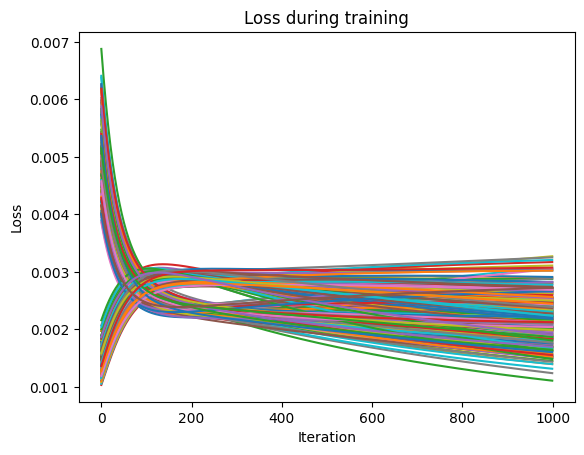

In [31]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

model = LogitRegression(0.05, 1000)
model.fit(X_train, Y_train)
plt.plot(model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.show()

## Step 11 - Make a prediction on test dataset by counting how many correct/incorrect predictions your model makes and print your accuracy


In [32]:
y_pred, weight = model.predict(X_test)
print(y_pred)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


In [33]:
accuracy_lst = []
weight_lst = []
accuracy = np.mean(y_pred == Y_test)
print(accuracy)
accuracy_lst.append(accuracy)
weight_lst.append(weight)

0.7910447761194029


## Fitting for different values of learning rate and iterations.

### Case 2

Iteration 4901: loss = 0.0024164395011828698
Iteration 4902: loss = 0.0024163834209800688
Iteration 4903: loss = 0.002416327345346342
Iteration 4904: loss = 0.0024162712742809207
Iteration 4905: loss = 0.00241621520778304
Iteration 4906: loss = 0.002416159145851933
Iteration 4907: loss = 0.002416103088486835
Iteration 4908: loss = 0.0024160470356869783
Iteration 4909: loss = 0.0024159909874515977
Iteration 4910: loss = 0.0024159349437799286
Iteration 4911: loss = 0.0024158789046712053
Iteration 4912: loss = 0.0024158228701246626
Iteration 4913: loss = 0.0024157668401395367
Iteration 4914: loss = 0.0024157108147150608
Iteration 4915: loss = 0.0024156547938504725
Iteration 4916: loss = 0.0024155987775450064
Iteration 4917: loss = 0.0024155427657978987
Iteration 4918: loss = 0.002415486758608385
Iteration 4919: loss = 0.002415430755975703
Iteration 4920: loss = 0.002415374757899088
Iteration 4921: loss = 0.0024153187643777773
Iteration 4922: loss = 0.002415262775411007
Iteration 4923: los

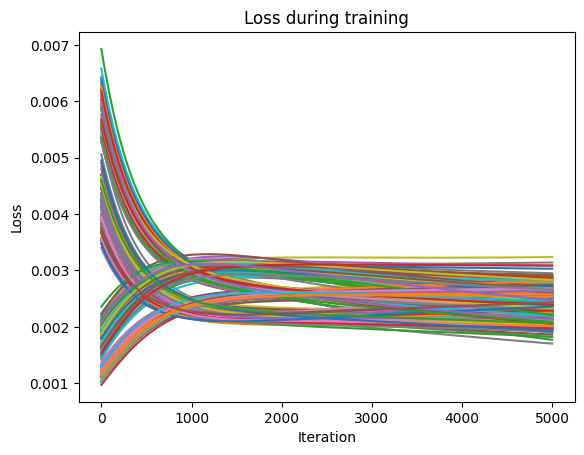

In [34]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

model1 = LogitRegression(0.005, 5000)
model1.fit(X_train, Y_train)
plt.plot(model1.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.show()

In [35]:
y_pred, weight = model1.predict(X_test)

In [36]:
accuracy = np.mean(y_pred == Y_test)
accuracy_lst.append(accuracy)
weight_lst.append(weight)
print('Accuracy =', accuracy)
print('Weights =', weight)

Accuracy = 0.6865671641791045
Weights = [-0.27837832 -0.64022809 -0.10331925 -0.34754058]


### Case 3

Iteration 401: loss = 0.00228287418441383
Iteration 402: loss = 0.0022819748170995443
Iteration 403: loss = 0.002281076520767181
Iteration 404: loss = 0.002280179293228564
Iteration 405: loss = 0.0022792831323034473
Iteration 406: loss = 0.0022783880358194716
Iteration 407: loss = 0.0022774940016121246
Iteration 408: loss = 0.002276601027524703
Iteration 409: loss = 0.002275709111408266
Iteration 410: loss = 0.0022748182511216014
Iteration 411: loss = 0.0022739284445311815
Iteration 412: loss = 0.0022730396895111245
Iteration 413: loss = 0.0022721519839431553
Iteration 414: loss = 0.002271265325716566
Iteration 415: loss = 0.002270379712728176
Iteration 416: loss = 0.002269495142882295
Iteration 417: loss = 0.002268611614090681
Iteration 418: loss = 0.0022677291242725072
Iteration 419: loss = 0.002266847671354318
Iteration 420: loss = 0.002265967253269994
Iteration 421: loss = 0.0022650878679607157
Iteration 422: loss = 0.0022642095133749212
Iteration 423: loss = 0.002263332187468274
I

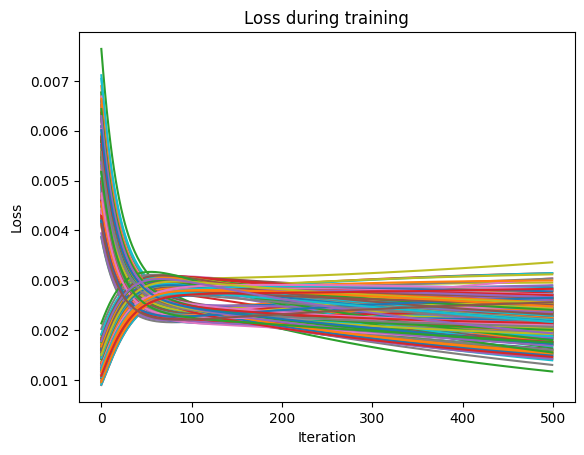

In [37]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

model2 = LogitRegression(0.098, 500)
model2.fit(X_train, Y_train)
plt.plot(model2.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.show()

In [38]:
y_pred, weight = model2.predict(X_test)

In [39]:
accuracy = np.mean(y_pred == Y_test)
accuracy_lst.append(accuracy)
weight_lst.append(weight)
print('Accuracy =', accuracy)
print('Weights =', weight)

Accuracy = 0.8507462686567164
Weights = [-0.31472138 -1.0505451  -0.17701025 -1.27164283]


In [40]:
max_accuracy = max(accuracy_lst)
i = accuracy_lst.index(max_accuracy)
weight_max = weight_lst[i]
print('Best Model Accuracy = ', max_accuracy)
print('Best Model Weights = ', weight_max)

Best Model Accuracy =  0.8507462686567164
Best Model Weights =  [-0.31472138 -1.0505451  -0.17701025 -1.27164283]


In [41]:
import pickle
pickle.dump( weight_max, open( "weight_pickle.p", "wb" ) )

In [42]:
weight_pickle = pickle.load( open( "weight_pickle.p", "rb" ) )

In [43]:
print(f'Weights for best accuracy {weight_pickle}')

Weights for best accuracy [-0.31472138 -1.0505451  -0.17701025 -1.27164283]
